# Data Augumentation
Let's take an in-depth look at the training data.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd

### Read CSVs

In [3]:
# Read CSVs using pandas.
ferplus = pd.read_csv('../data/ferplus.csv')
ckplus = pd.read_csv('../data/ckplus.csv')
# Extract and cast pixel intensities.
ferplus.pixels = ferplus.pixels.str.split()
ferplus.pixels = ferplus.pixels.map(lambda p: pd.to_numeric(p, downcast='float'))
ckplus.pixels = ckplus.pixels.str.split()
ckplus.pixels = ckplus.pixels.map(lambda p: pd.to_numeric(p, downcast='float'))

In [71]:
# Class labels in the usual order.
classes = ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral']

### FERplus Class Distribution

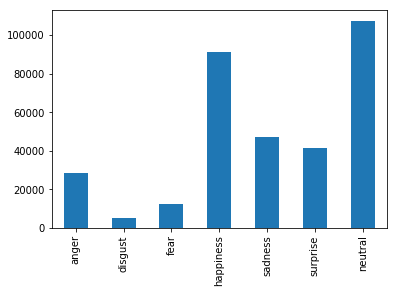

In [72]:
ferplus.sum(axis=0)[classes].plot.bar()

The class distributions is imbalanced.

In [84]:
ferplus

,Usage,pixels,neutral,happiness,surprise,sadness,anger,disgust,fear,contempt,unknown,NF
0,Training,"[70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63....",4,0,0,1,3,2,0,0,0,0
1,Training,"[151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 111...",6,0,1,1,0,0,0,0,2,0
2,Training,"[231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 161...",5,0,0,3,1,0,0,0,1,0
3,Training,"[24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20....",4,0,0,4,1,0,0,0,1,0
4,Training,"[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",9,0,0,1,0,0,0,0,0,0
5,Training,"[55.0, 55.0, 55.0, 55.0, 55.0, 54.0, 60.0, 68....",6,0,0,1,0,0,1,1,1,0
6,Training,"[20.0, 17.0, 19.0, 21.0, 25.0, 38.0, 42.0, 42....",2,0,0,8,0,0,0,0,0,0
7,Training,"[77.0, 78.0, 79.0, 79.0, 78.0, 75.0, 60.0, 55....",0,10,0,0,0,0,0,0,0,0
8,Training,"[85.0, 84.0, 90.0, 121.0, 101.0, 102.0, 133.0,...",0,10,0,0,0,0,0,0,0,0
9,Training,"[255.0, 254.0, 255.0, 254.0, 254.0, 179.0, 122...",0,0,6,0,0,0,4,0,0,0


### CK+ Class Distribution

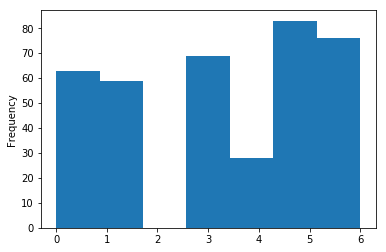

In [83]:
ckplus['class'].plot.hist(bins=7)